<a href="https://colab.research.google.com/github/renebttg/DataWarehouse_DataLake/blob/main/EXEMPLO_DATALAKE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

# Verifica se a pasta 'data_lake' existe, caso contrário, cria-a
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

# Define a quantidade de arquivos a serem gerados e o número de linhas por arquivo
num_files = 10
num_rows_per_file = 1000

# Lista para armazenar os dataframes e os nomes dos arquivos correspondentes
dfs = []

# Loop para gerar os dataframes e salvar como arquivos CSV
for i in range(num_files):
    # Gera dados aleatórios para três colunas
    data = {
        'coluna1' : np.random.randint(0, 100, num_rows_per_file),
        'coluna2' : np.random.randn(num_rows_per_file),
        'coluna3' : np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    # Cria um dataframe com os dados gerados
    df = pd.DataFrame(data)

    # Define o nome do arquivo com base no índice do loop e salva o dataframe como CSV no diretório especificado sem indexar as linhas
    file_name = f'data_lake/dados_{i+1}.csv'
    df.to_csv(file_name, index=False)

    # Adiciona uma tupla contendo o nome do arquivo e o dataframe à lista
    dfs.append((file_name, df))

print("Dados do Data Lake gerados com sucesso!")

# Exibe as primeiras linhas de cada arquivo gerado para verificação
for file_name, df in dfs:
    print(f"\nConteúdo do arquivo: {file_name}\n")
    print(df.head())

Dados do Data Lake gerados com sucesso!

Conteúdo do arquivo: data_lake/dados_1.csv

   coluna1   coluna2 coluna3
0       22  0.140285       C
1       89  2.470626       B
2       18 -0.307404       A
3        1  0.641911       A
4        0  1.115379       A

Conteúdo do arquivo: data_lake/dados_2.csv

   coluna1   coluna2 coluna3
0       26  0.349931       C
1       70  1.054189       A
2       42 -0.542505       B
3       21  0.993400       A
4       83  0.333552       C

Conteúdo do arquivo: data_lake/dados_3.csv

   coluna1   coluna2 coluna3
0        1  0.709826       A
1       30 -1.233739       B
2       36 -0.000359       B
3       89 -0.664351       B
4        2 -1.336953       C

Conteúdo do arquivo: data_lake/dados_4.csv

   coluna1   coluna2 coluna3
0        8 -0.953637       C
1        3 -1.047330       C
2       73 -0.524421       B
3       78  0.128984       C
4       88 -0.315741       A

Conteúdo do arquivo: data_lake/dados_5.csv

   coluna1   coluna2 coluna3
0       97

Amostra inicial do DataFrame:
   coluna1   coluna2 coluna3
0        6 -0.769141       B
1       22 -1.505781       A
2       63 -0.513356       A
3       75  0.180660       C
4       34 -1.318051       B

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Resumo estatístico do DataFrame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     49.411000     0.071923
std      29.472779     1.011704
min       0.000000    -3.224672
25%      24.000000    -0.660769
50%      50.000000     0.041693
75%      75.000000     0.760312
max      99.000000     3.479677


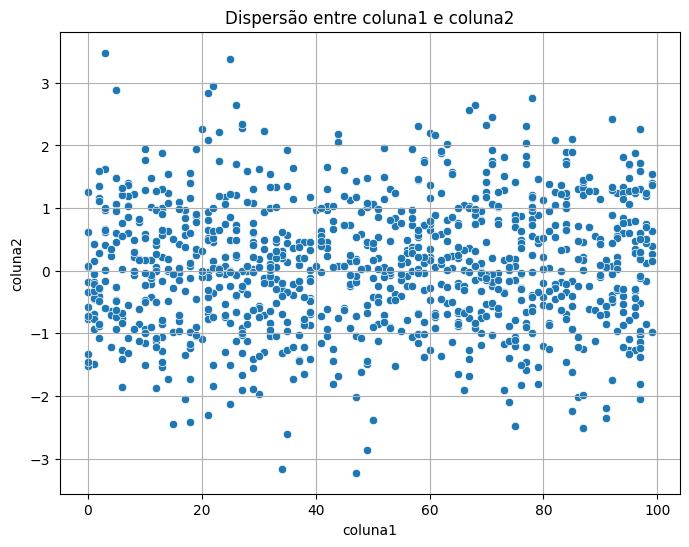

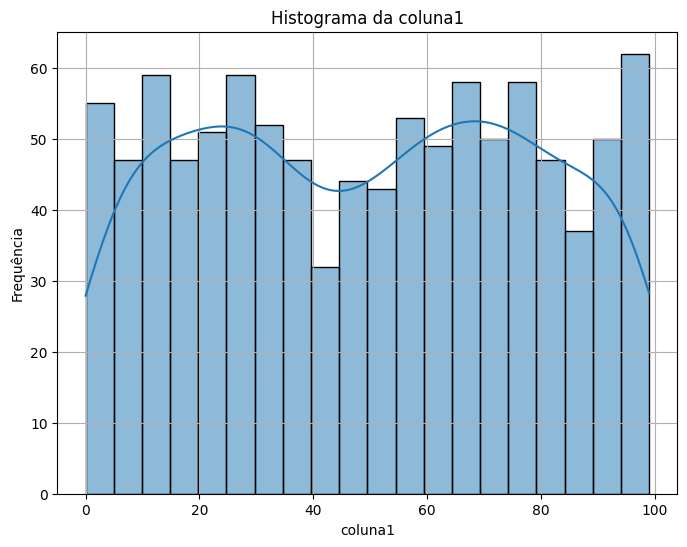

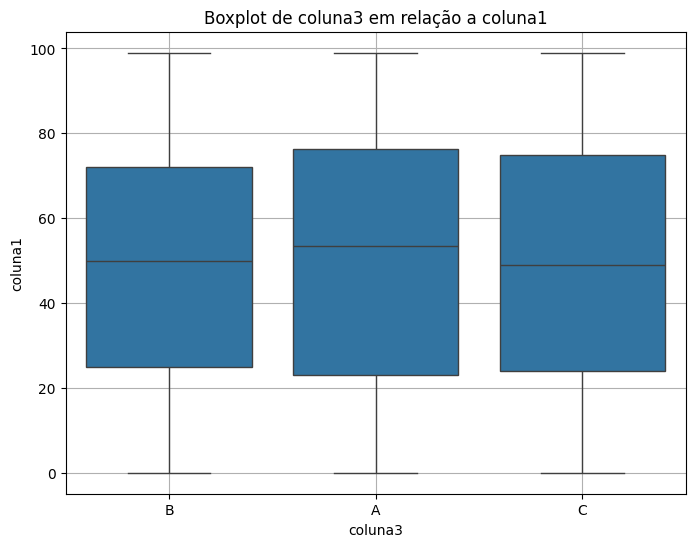

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Conecta-se a um banco de dados SQLite chamado 'data_lake.db' utilizando SQLAlchemy
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

# Exibe as primeiras linhas do DataFrame para uma verificação inicial dos dados
print("Amostra inicial do DataFrame:")
print(df.head())

# Apresenta informações sobre o DataFrame, incluindo tipos de dados e presença de valores nulos
print("\nInformações do DataFrame:")
print(df.info())

# Mostra um resumo estatístico das colunas numéricas do DataFrame, como média, desvio padrão, mínimo e máximo
print("\nResumo estatístico do DataFrame:")
print(df.describe())

# Plota um gráfico de dispersão entre duas colunas, 'coluna1' e 'coluna2', usando Seaborn para visualizar a relação entre elas
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Desenha um histograma para 'coluna1' com uma curva de densidade estimada (KDE) usando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Gera um boxplot para visualizar a distribuição de 'coluna1' agrupada por 'coluna3' usando Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot de coluna3 em relação a coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()